# Travelling Salesman Problem using Simulated Annealing

## Import Essensial libraries

In [35]:
import numpy as np
import random
from matplotlib import pyplot as plt
import time

### Generating a Distance Matrix

In [36]:
#Generating a distance matrix with diagonals as 0
def distance_matrix(cities, n_c):
    #Creating a nxn matrix 
    distances = np.zeros([n_c,n_c]) #where n_c is number of cities
    
    for i in range(len(cities)):
        for j in range(len(cities)):
            #Calculating eucludian distance 
            distances[i][j] = np.around(np.sqrt((cities[i][0] - cities[j][0])**2 + (cities[i][1] - cities[j][1])**2), 2)
            
    return distances

### Calculating Total Distance

In [37]:
#Calculating the total distance for the given
def total_distance(sols):
    
    total_dist = 0
    for i in range(n_c):
        j = (i + 1) % n_c #Looping through all the indexes and adding the final index with the initial Index
        total_dist += dist_mat[sols[i], sols[j]]
        
    return total_dist

### Generating new Solutions using Mutation

In [38]:
def new_solution(sol):
    #generating 2 random numbers
    a, b = sorted(np.random.choice(range(n_c), size=2, replace=False))
    #swapping the list with respect to the indexes
    return sol[:a] + sol[a:b][::-1] + sol[b:]
    

### Classic Method

In [39]:
def classic_method(cities):
    #Calculate distances
    distances = np.zeros([n_c,n_c])
    #Creating a new distance matrix for this classic method
    for i in range(len(cities)):
        for j in range(len(cities)):
            dist = np.around(np.sqrt((cities[i][0] - cities[j][0])**2 + (cities[i][1] - cities[j][1])**2), 2)
            if dist == 0:
                #making 0 as infinite 
                distances[i][j]  = np.inf

            else: distances[i][j]  = dist 
            
    best_sol = np.zeros([n_c])
    
    #STEP 1 : CHOOSE LEAST DISTANCE FOR THE CITY(FIRST)
    best_sol[0] = 0   #Home index
    a = np.array(distances[0]) #first city distances array
    best_sol[1] = int(np.argmin(a)) #index of least distance city

    #STEP 2 : ADDING DISTANCE
    best_dist = a.min() #distance from first city to least distance city
    
    dummy_mat = np.copy(distances)
    #MAKE THE COLUMN AS INF 
    dummy_mat[:,int(best_sol[1])] = np.inf
    
    dist_list = np.zeros([n_c])
    dist_list[0] = best_dist
    
    #Traditional method
    for i in range(1,n_c):
        #HERE i starts from least city index
        statement = True
        
        #Checking the condition
        while statement: 
            #GO TO THE CITY INDEX AND FIND THE LEAST CITY
            #CHECK CONDITION WEATHER THE LEAST CITY IS NOT 1st CITY UNLESS FOR LAST CITY
            cur_ind  = int(best_sol[i])
            cur_city = dummy_mat[cur_ind]
            min_distance_index = int(np.argmin(cur_city))
            
            if min_distance_index == 0 and i != n_c - 1:
                dummy_mat[cur_ind, 0] = np.inf
                continue

            elif i == n_c-1:
                dist_list[i] = cur_city.min() 
                best_dist = best_dist + cur_city[0]
                break

            else:
                statement = False
                best_sol[i+1] = int(np.argmin(cur_city))
                dist_list[i] = cur_city.min() 
                best_dist = best_dist + cur_city.min() 
                #MAKE THE ROW AND COLUMN AS INF 
                dummy_mat[cur_ind,:] = np.inf
                dummy_mat[:,min_distance_index] = np.inf
    
    return best_sol, np.round(best_dist,2)

## Simulated Annealing Algorithm

In [40]:
def simulated_annealing(int_sol, int_temp, cool_rate, iterations):
    
    #initialising the parameters
    sa_sols = np.zeros([0])
    sa_cur_sols = np.zeros([0])
    temperatures = np.zeros([0])
    
    cur_sol = int_sol
    cur_dist = total_distance(int_sol)
    
    best_sol = int_sol
    best_dist = cur_dist
    
    cur_temp = int_temp
    
    sa_sols = np.append(sa_sols, best_dist)
    
    #Iterating the Algorithm
    for i in range(iterations):
        #Generate New Solution using mutation and calculating distance   
        new_sol = new_solution(cur_sol)
        new_dist = total_distance(new_sol)
        
        ''' Condition: 
            if new distance < current distance : accept the new solution
            Also
            if new distance > current distance : We consider the solution 
            based on exp(ΔE/T) and probability relation
            where, ΔE = curr_dist - new_dist, T is the current Temperature
            if exp(ΔE/T) > probability: accept the new solution
        '''

        exp_delta = min(1,np.exp(-(new_dist-cur_dist)/int_temp))
        rand_prob = np.random.uniform(0,1)
        if new_dist < cur_dist or exp_delta > rand_prob:
            cur_sol = new_sol
            cur_dist = new_dist
        #Updating Based on the value of the generated solution    
        if new_dist < best_dist:
            best_sol = new_sol
            best_dist = new_dist
        
        #Updating the cooling rate
        cur_temp = cur_temp * cool_rate  
        temperatures = np.append(temperatures, cur_temp)
        sa_cur_sols = np.append(sa_cur_sols, cur_dist)
        sa_sols = np.append(sa_sols, best_dist)
    
    #Plotting the generated solutions
    plt.title('Simulated Annealing Orange =  Current Solutions || Red = Best Solutions')
    plt.plot(sa_sols, color='red')
    plt.plot(sa_cur_sols, color='orange')  
          
    return best_sol, np.around(best_dist,2)

## Random Search Algorithm

In [41]:
#Generating the best distance using Random Search Algorithm
def random_search(iterations):
    rs_sols = np.zeros([0])   #array which has all generated best solutions
    #initialising the parameters
    best_dist = float('inf')
    best_sol = []
    for i in range(iterations):
        #Generating a Random solution
        curr_sol = random.sample(range(n_c), n_c)
        #Calculating it's distance
        new_dist = total_distance(curr_sol)
        #Comparing to find the least distance(minimisation)
        if new_dist < best_dist:
            #Updating if best solution is found
            best_dist = new_dist
            best_sol = curr_sol
        rs_sols = np.append(rs_sols, best_dist)
    
    #Plotting the generated solutions
    plt.title('Random Search solutions')
    plt.plot(rs_sols, color= 'green')
    
    return best_sol, np.around(best_dist,2)

### Stochastic Hill Climbing Algorithm 

In [42]:
def stochastic_hill_climbing(int_sol, iterations):
    #initialising the parameters
    shc_sols = np.zeros([0]) #array which has all generated best solutions
    shc_cur_sols = np.zeros([0])
    best_sol = int_sol
    best_dist = total_distance(best_sol)
    cur_sol = best_sol
    
    for i in range(iterations):
        #Generating random Numbers from the solution
        new_sol = cur_sol.copy()
        i, j = sorted(np.random.choice((n_c), 2, replace=False))
        #Performing reverse operation in between the random numbers
        new_sol[i:j+1] = reversed(new_sol[i:j+1])
        #Calculating the new distance
        new_dist = total_distance(new_sol)
        
        acceptable_diff = 10   #change this accordingly 
        
        #Condition : selecting the minimum distance
        if new_dist < best_dist :
            #Updating the best solutions
            best_sol = new_sol
            cur_sol = new_sol
            best_dist = new_dist
            shc_cur_sols = np.append(shc_cur_sols, best_dist)
        elif (new_dist - best_dist) <= acceptable_diff:
            cur_sol = new_sol
            shc_cur_sols = np.append(shc_cur_sols, new_dist)    
            
        shc_sols = np.append(shc_sols, best_dist)
               
    #Plotting the generated solutions
    title = 'Stochastic Hill Climbing || Gray =  Current Solutions || Blcak = Best Solutions'
    plt.plot(shc_sols, color='black')
    plt.plot(shc_cur_sols, color='gray') 
    
    plot_solutions(title, shc_cur_sols, 'gray', shc_sols, 'black')
    
    return best_sol, np.around(best_dist,2)

### Plotting the graph between the coordinates

In [43]:
#Plotting to see the graphical representation of the coordinates
def graph(sol, title_str):
    x,y = np.zeros([0]), np.zeros([0])
    for i in range(len(sol)):
        a = int(sol[i])
        x = np.append(x, cities[a][0])
        y = np.append(y, cities[a][1])
    
    X_co, Y_co = x, y
    
    b = int(sol[0])
    x = np.append(x, cities[b][0])
    y = np.append(y, cities[b][1])

    fig, ax = plt.subplots()
    ax.scatter(X_co, Y_co)
    ax.plot(x, y, '-')

    # Set the x and y axis labels
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title(title_str)
    
    plt.show()

#for simulated annealing and Stochastic hill climbing
def plot_solutions(title, curr, color1, best, color2):
    plt.title(title)
    plt.plot(curr, color = color1)
    plt.plot(best, color=color2)

#For random Search
def plot_solution(title, best, color1):
    plt.title(title)
    plt.plot(best, color=color1)
        

### Declare number of Cities and Generate Co-ordinates 

In [44]:
#Global Variables
n_c = 100  #number of cities [25, 40, 60, 100]
cities = np.random.rand(n_c, 2) * 100 #coordinated based on the number of cities
dist_mat = distance_matrix(cities, n_c)

In [45]:
iterations = 10_000 # total number of iterations

#Generates random solutions
int_sol = random.sample(range(n_c), n_c)

#plt.figure(figsize=(12,8))

#for Simulated Annealing
int_temp = 1
cool_rate = (iterations-1)/iterations

 Loop number :  0
 Loop number :  1
 Loop number :  2
 Loop number :  3
 Loop number :  4
cities :  100  iteration :  10000
Algorithm Name      || Min    || Average || values
Simulated Annealing :  884.07   922.55  
Random Search       :  4466.98   4535.39  
Hill Climbing       :  966.6   1040.71  
Classical Method    :  958.32


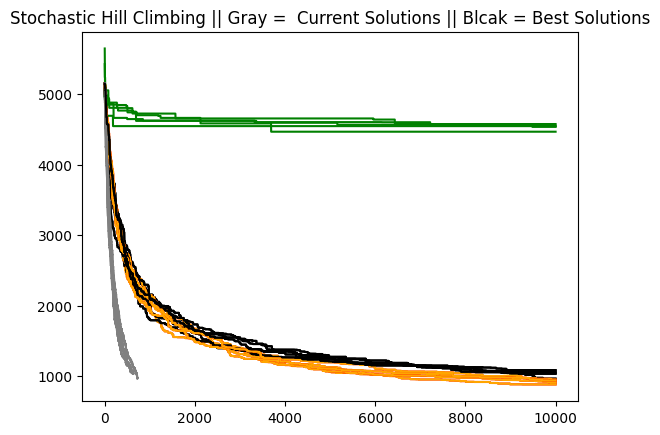

In [46]:
def main_function(int_sol, iterations, count):
    
    print(' Loop number : ', count)
    
    sa_sol, sa_dist = simulated_annealing(int_sol, int_temp, cool_rate, iterations)
    rs_sol, rs_dist  = random_search(iterations)
    hc_sol, hc_dist = stochastic_hill_climbing(int_sol, iterations)
    
    return sa_dist, rs_dist, hc_dist

sa_sols = []
rs_sols = []
hc_sols = []

for i in range(5):
    sa, rs, hc = main_function(int_sol, iterations, i)
    sa_sols.append(sa)
    rs_sols.append(rs)
    hc_sols.append(hc)
    
cm_sol, cm_dist = classic_method(cities)
    
print('cities : ', n_c ,' iteration : ', iterations)
print('Algorithm Name      || Min    || Average || values')
print('Simulated Annealing : ',min(sa_sols), ' ', np.around(np.average(sa_sols),2), ' ')
print('Random Search       : ',min(rs_sols), ' ', np.around(np.average(rs_sols),2), ' ')
print('Hill Climbing       : ',min(hc_sols), ' ', np.around(np.average(hc_sols),2), ' ')
print('Classical Method    : ',cm_dist)

### Run the Below cells for Results

Classic Method :  958.32 | Time  :  0.05


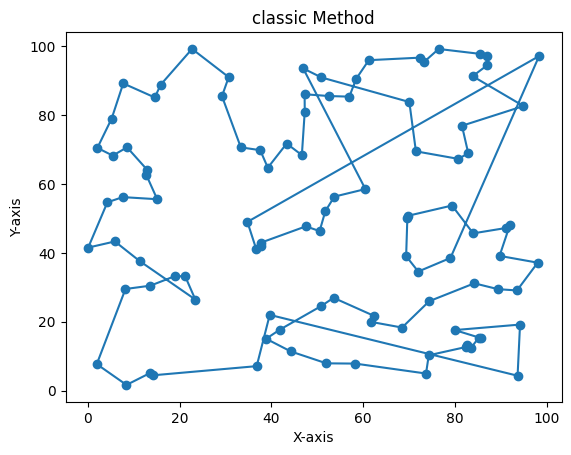

In [47]:
#classic Method
cm_time = time.time()
cm_sol, cm_dist = classic_method(cities)
cm_end_time = time.time() - cm_time
print('Classic Method : ',cm_dist,'| Time  : ', np.around(cm_end_time,2))
graph(cm_sol, 'classic Method')

Simulated annealing :  890.82 | Time  :  0.41


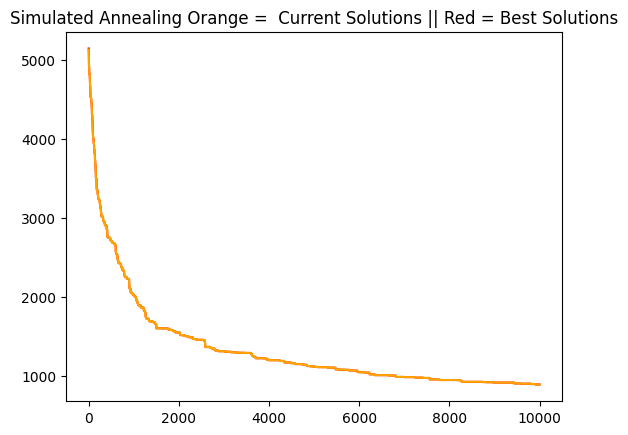

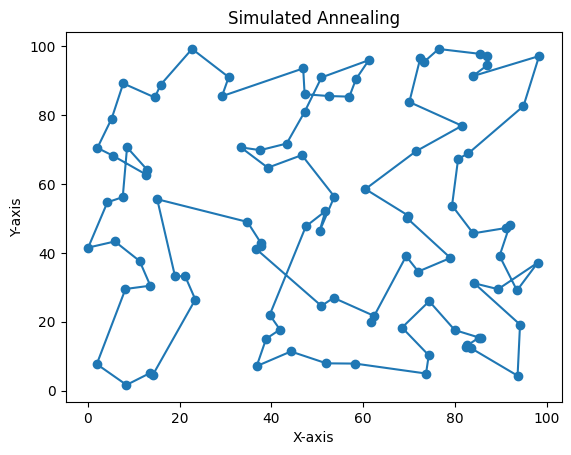

In [48]:
#Simulated Annealing
sa_time = time.time()
sa_sol, sa_dist = simulated_annealing(int_sol, int_temp, cool_rate, iterations)
sa_end_time = time.time() - sa_time
print('Simulated annealing : ',sa_dist,'| Time  : ', np.around(sa_end_time,2))
graph(sa_sol, 'Simulated Annealing')

Random search distance :  4501.63 | Time  :  0.46


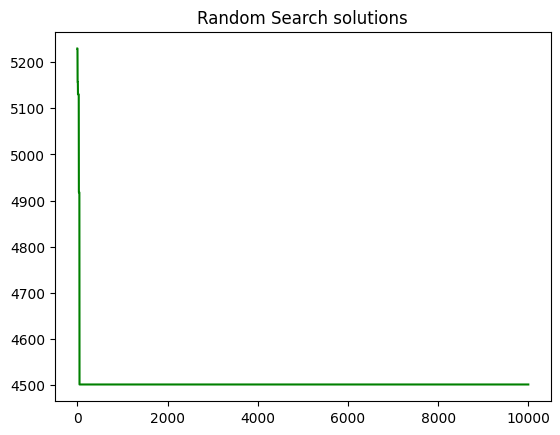

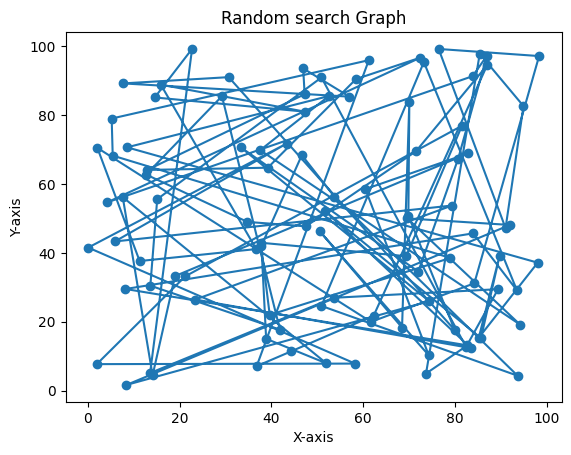

In [49]:
#Random Search
rs_time = time.time()
rs_sol, rs_dist  = random_search(iterations)
rs_end_time = time.time() - rs_time 
print('Random search distance : ',rs_dist,'| Time  : ', np.around(rs_end_time,2))
graph(rs_sol, "Random search Graph")

Stochastic Hill climbing distance :  1102.81 | Time  :  0.35


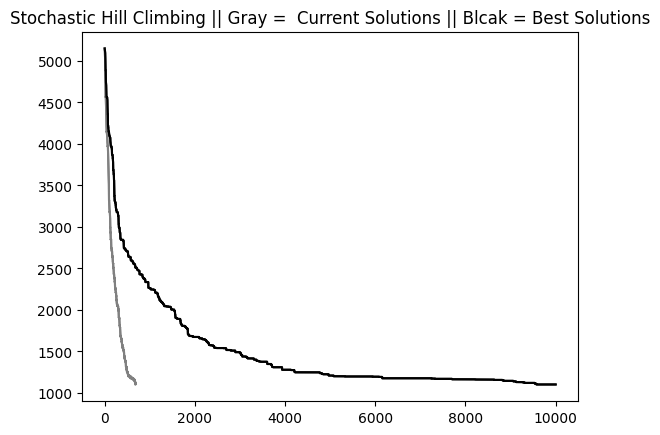

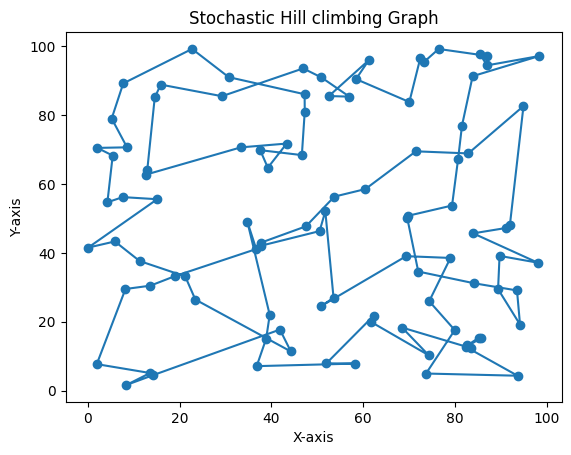

In [50]:
#Stochastic Hill Climbing
hc_time = time.time()
hc_sol, hc_dist = stochastic_hill_climbing(int_sol, iterations)
hc_end_time = time.time() - hc_time
print('Stochastic Hill climbing distance : ', hc_dist,'| Time  : ', np.around(hc_end_time,2))
graph(hc_sol, "Stochastic Hill climbing Graph")

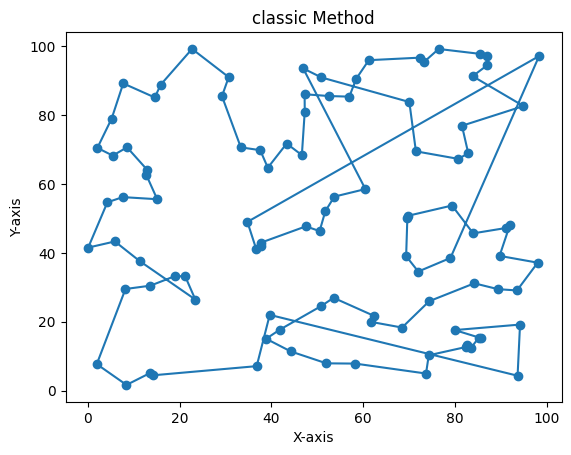

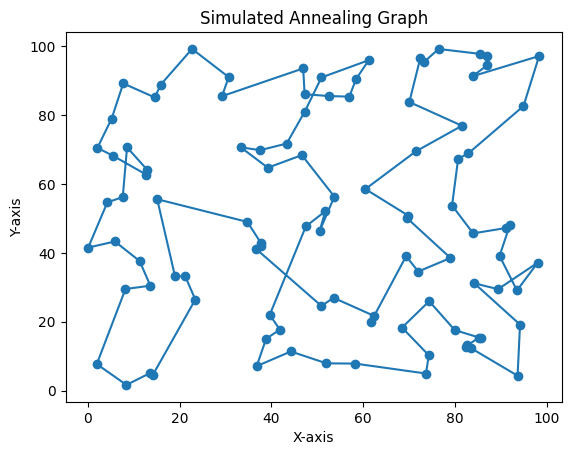

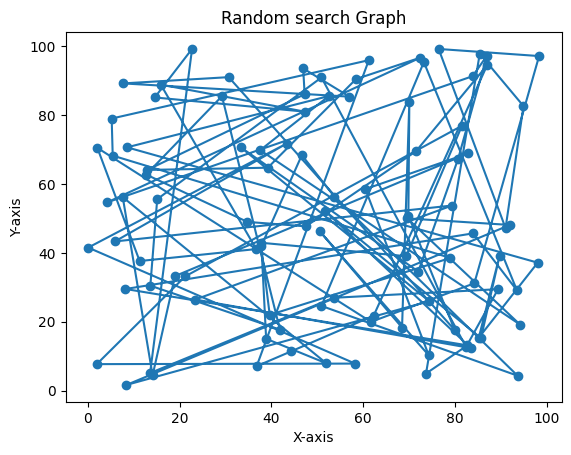

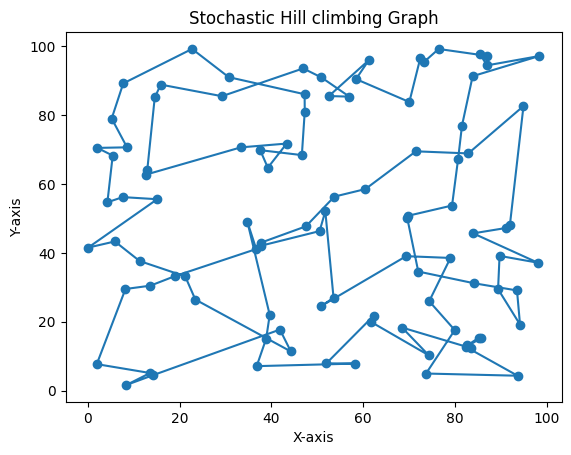

In [51]:
graph(cm_sol, 'classic Method')
graph(sa_sol, "Simulated Annealing Graph")
graph(rs_sol, "Random search Graph")
graph(hc_sol, "Stochastic Hill climbing Graph")